In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
%matplotlib inline

In [4]:
sb.set_palette('hls')

In [5]:
df = pd.read_csv('new.csv')

In [6]:
day = df[['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday' ]]

In [7]:
temp_arr=[]
for r in list(range(day.shape[0])):
    for c in list(range(day.shape[1])):
        if ((c==0) and (day.iloc[r,c])==1):
            temp_arr.append('Monday')
        elif ((c==1) and (day.iloc[r,c])==1):
            temp_arr.append('Tuesday')
        elif ((c==2) and (day.iloc[r,c])==1):
            temp_arr.append('Wednesday')
        elif ((c==3) and (day.iloc[r,c])==1):
            temp_arr.append('Thursday')
        elif ((c==4) and (day.iloc[r,c])==1):
            temp_arr.append('Friday')
        elif ((c==5) and (day.iloc[r,c])==1):
            temp_arr.append('Saturday') 
        elif ((c==6) and (day.iloc[r,c])==1):
            temp_arr.append('Sunday')

In [8]:
datachannel=df[['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus','data_channel_is_socmed' , 'data_channel_is_tech', 'data_channel_is_world' ]]

In [9]:
datachannel_arr=[]
for r in list(range(datachannel.shape[0])):
    if (((datachannel.iloc[r,0])==0) and ((datachannel.iloc[r,1])==0) and ((datachannel.iloc[r,2])==0) and ((datachannel.iloc[r,3])==0) and ((datachannel.iloc[r,4])==0) and ((datachannel.iloc[r,5])==0)):
        datachannel_arr.append('Others')
    for c in list(range(datachannel.shape[1])):
        if ((c==0) and (datachannel.iloc[r,c])==1):
            datachannel_arr.append('Lifestyle')
        elif ((c==1) and (datachannel.iloc[r,c])==1):
            datachannel_arr.append('Entertainment')
        elif ((c==2) and (datachannel.iloc[r,c])==1):
            datachannel_arr.append('Business')
        elif ((c==3) and (datachannel.iloc[r,c])==1):
            datachannel_arr.append('Social Media')
        elif ((c==4) and (datachannel.iloc[r,c])==1):
            datachannel_arr.append('Tech')
        elif ((c==5) and (datachannel.iloc[r,c])==1):
            datachannel_arr.append('World')

In [10]:
df.insert(loc=11, column='weekdays', value=temp_arr)
df.insert(loc=12, column='data_channel', value=datachannel_arr)

# Now I drop the old data
df.drop(labels=['data_channel_is_lifestyle','data_channel_is_entertainment' ,'data_channel_is_bus',
                        'data_channel_is_socmed' ,'data_channel_is_tech','data_channel_is_world', 
                 'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday', 
                      'weekday_is_thursday', 'weekday_is_friday','weekday_is_saturday' ,'weekday_is_sunday'], axis = 1, inplace=True)

In [11]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,target_shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593.0,0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711.0,0
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500.0,1
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200.0,0
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,8.5,8.5,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505.0,0


## viz

**target variable**

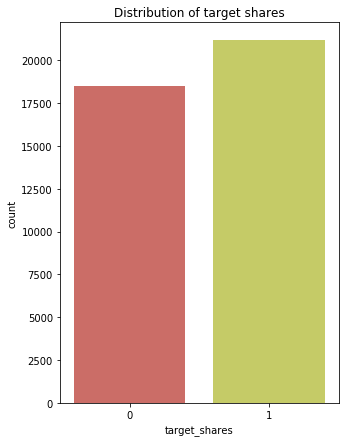

In [15]:
plt.figure(figsize=(5,7))
sb.countplot(df['target_shares'])
plt.title('Distribution of target shares')
plt.show()

**features**

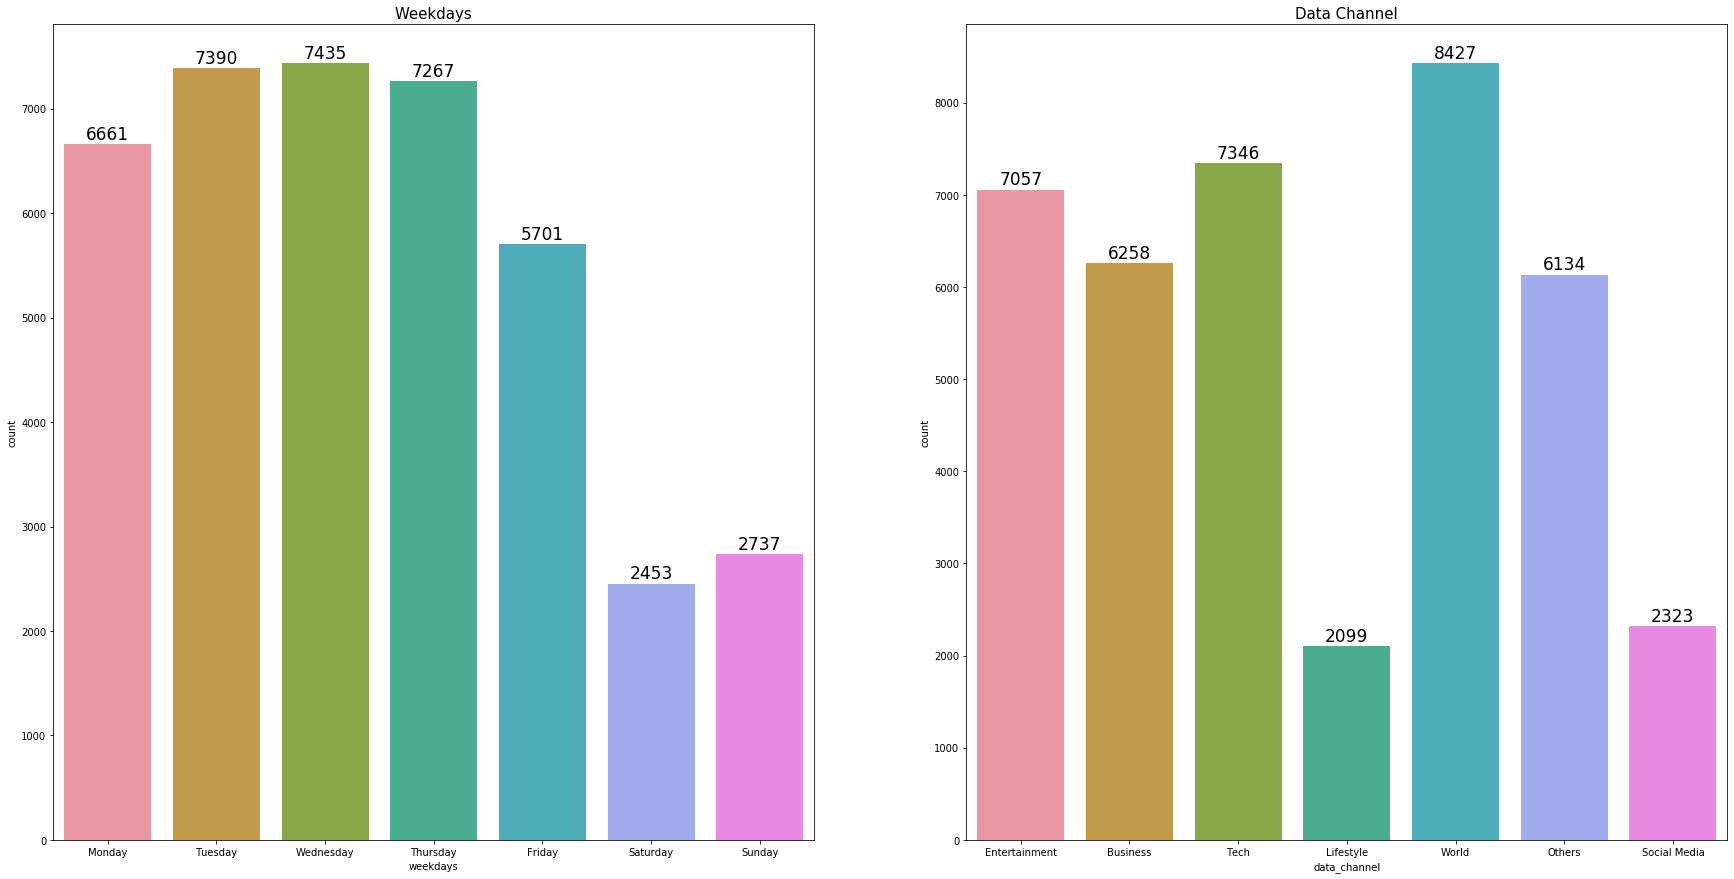

In [103]:
plt.figure(figsize=(30,15))

plt.subplot(1,2,1)
a=sb.countplot(df['weekdays'])#hue=df['target_shares'])
for p in a.patches:
        a.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize = 17)
plt.title('Weekdays',fontsize=15)
        
plt.subplot(1,2,2)
b=sb.countplot(df['data_channel'])#hue=df['target_shares'])
for p in b.patches:
        b.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., 
        p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize = 17)
plt.title('Data Channel',fontsize=15)
plt.show()

*As you can see, the weekdays have the highest number of shares. Wednesday, Tuesday, Thursday and Monday have the highest number of shares, with Friday having a significant drop.*

*We can also see which category or topic does the best. Here is a bar chart for the seven categories Tech, Entertainment, World, Business, Social Media, Lifestyle and Others.*

*The best performing category is World, followed by Tech, Entertainment, Business. The least popular categories are Social Media and Lifestyle.*


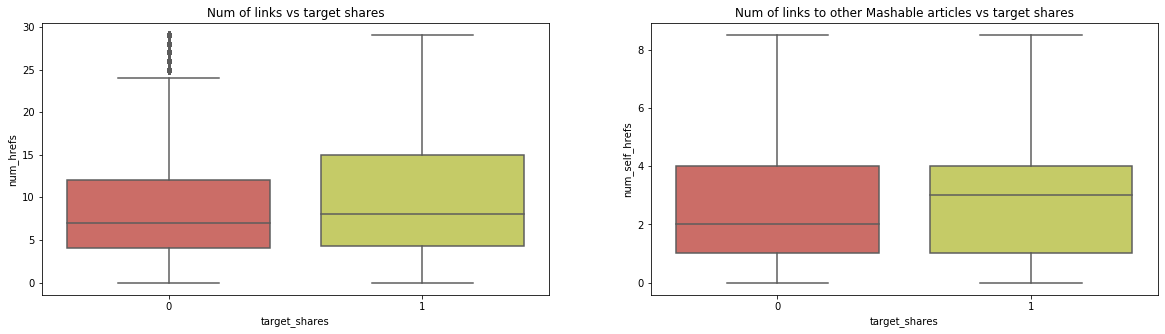

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sb.boxplot(y=df['num_hrefs'],x=df['target_shares'])
plt.title('Num of links vs target shares')

plt.subplot(1,2,2)
sb.boxplot(y=df['num_self_hrefs'],x=df['target_shares'])
plt.title('Num of links to other Mashable articles vs target shares')

plt.show()

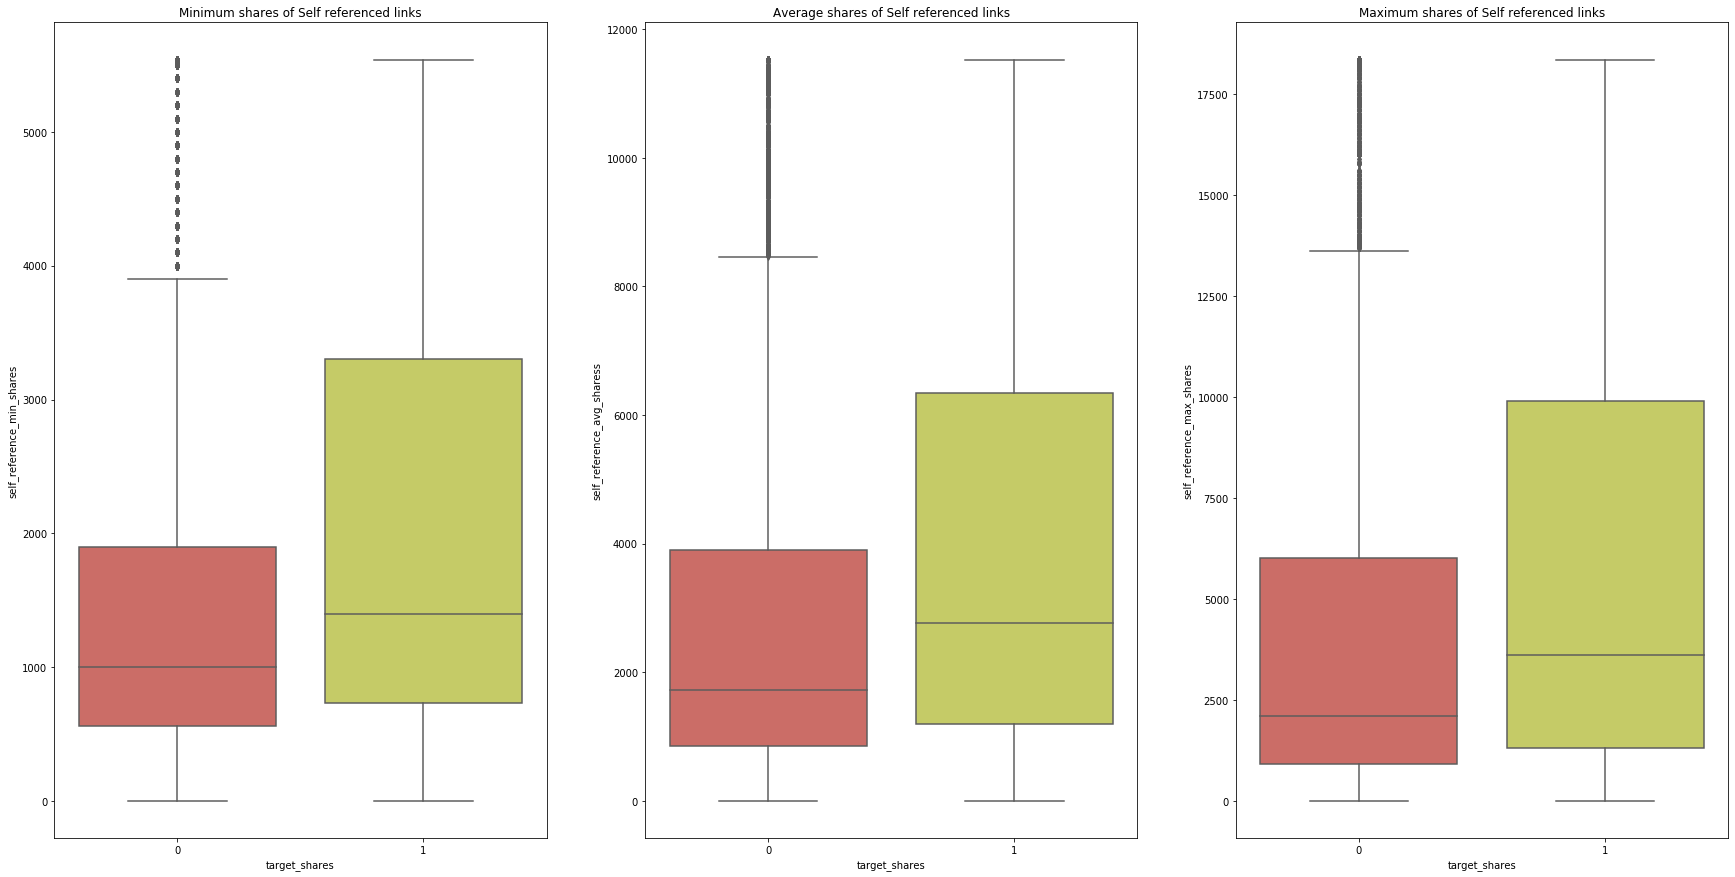

In [20]:
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
sb.boxplot(y=df['self_reference_min_shares'],x=df['target_shares'])
plt.title('Minimum shares of Self referenced links')


plt.subplot(1,3,2)
sb.boxplot(y=df['self_reference_avg_sharess'],x=df['target_shares'])
plt.title('Average shares of Self referenced links')


plt.subplot(1,3,3)
sb.boxplot(y=df['self_reference_max_shares'],x=df['target_shares'])
plt.title('Maximum shares of Self referenced links')


plt.show()

*When there are links embedded in the news article which point them to stories by other sources or referring to the news on their own website, seems to increase the popularity. If we look at both the references, the popularity increases when they refer the links from mashable compared to other online sources.*


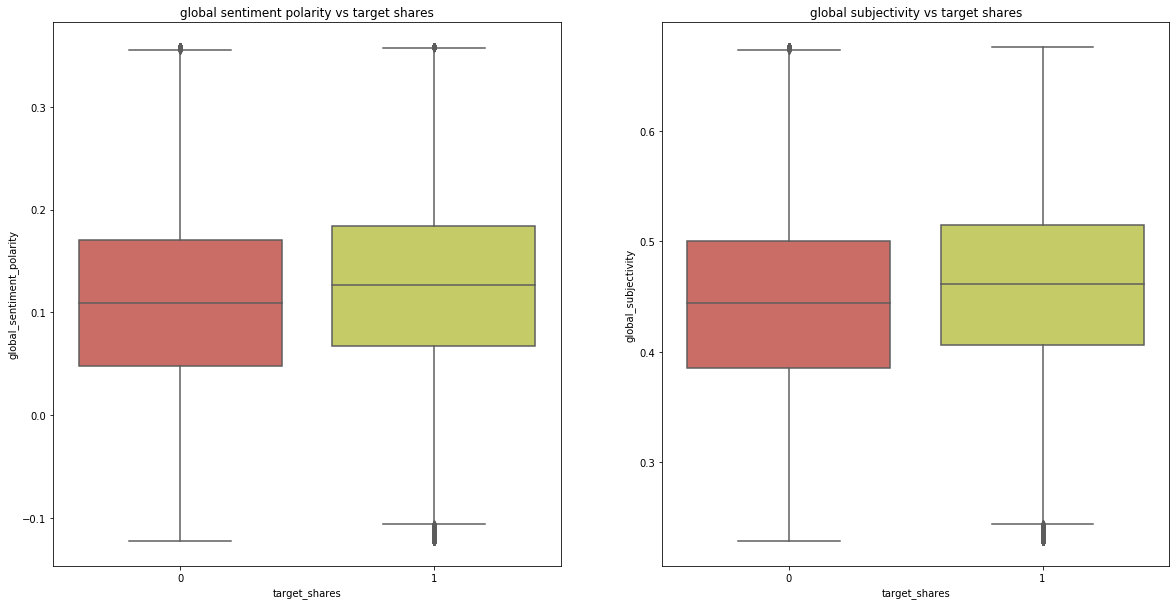

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sb.boxplot(y=df['global_sentiment_polarity'],x=df['target_shares'])
plt.title('global sentiment polarity vs target shares')

plt.subplot(1,2,2)
sb.boxplot(y=df['global_subjectivity'],x=df['target_shares'])
plt.title('global subjectivity vs target shares')

plt.show()

**Polarity** *in sentiment analysis refers to identifying sentiment orientation (positive, neutral, and negative) in written or spoken language.*

**Subjectivity** *refers to the quality of being based on or influenced by personal feelings, tastes, or opinions.*


*The articles with more subjectivity and polarity tend to be more popular among the online news.*

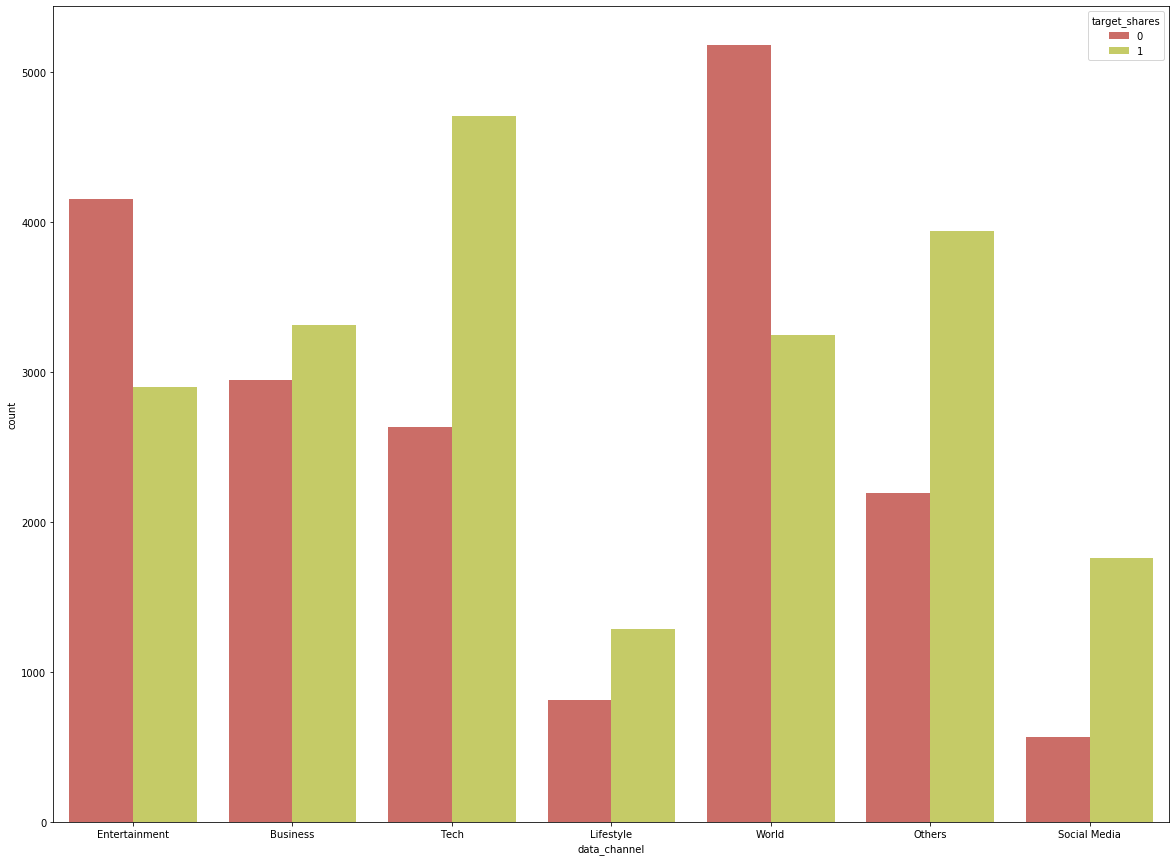

In [17]:
plt.figure(figsize=(20,15))
sb.countplot(df['data_channel'],hue = df['target_shares'])
plt.show()

**No. of words in title and content**

In [25]:
import numpy as np

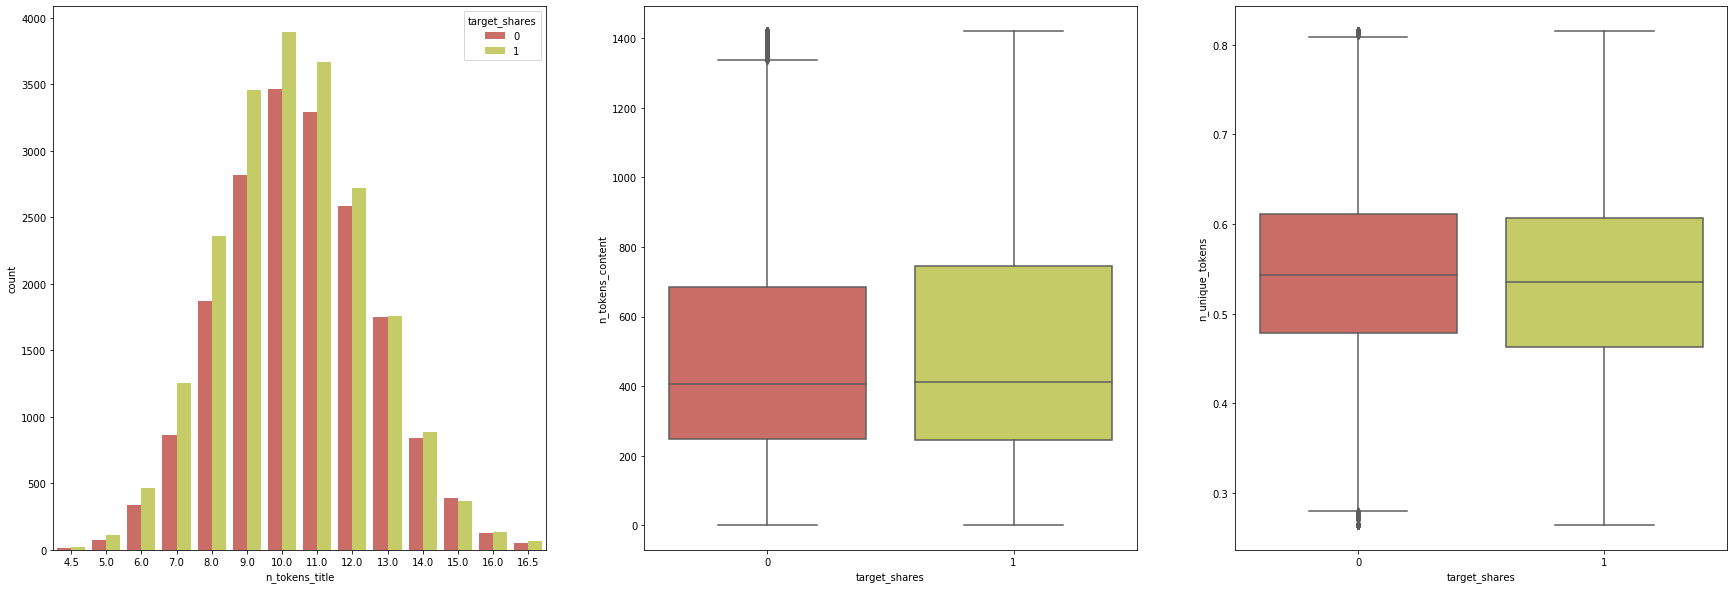

In [26]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sb.countplot(df['n_tokens_title'],hue=df['target_shares'])

plt.subplot(1,3,2)
sb.boxplot(y=df['n_tokens_content'],x=df['target_shares'])

plt.subplot(1,3,3)
sb.boxplot(y=df['n_unique_tokens'],x=df['target_shares'])
plt.show()

**Num of keywords**

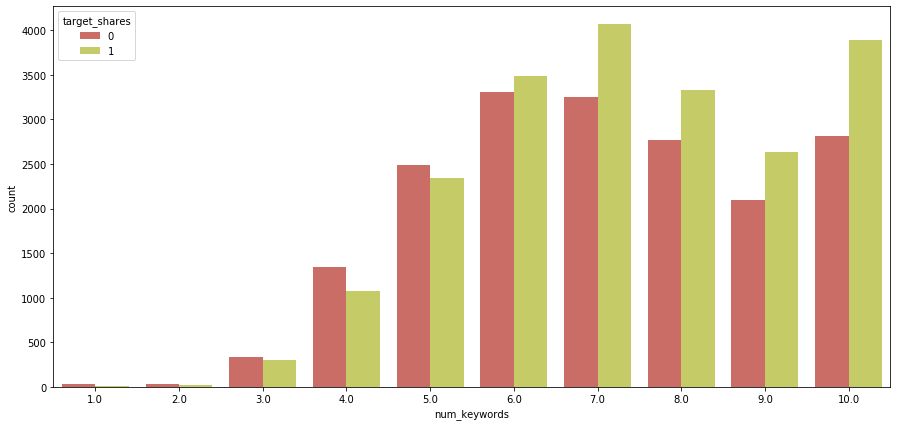

In [29]:
plt.figure(figsize=(15,7))
sb.countplot(df['num_keywords'],hue=df['target_shares'])
plt.show()

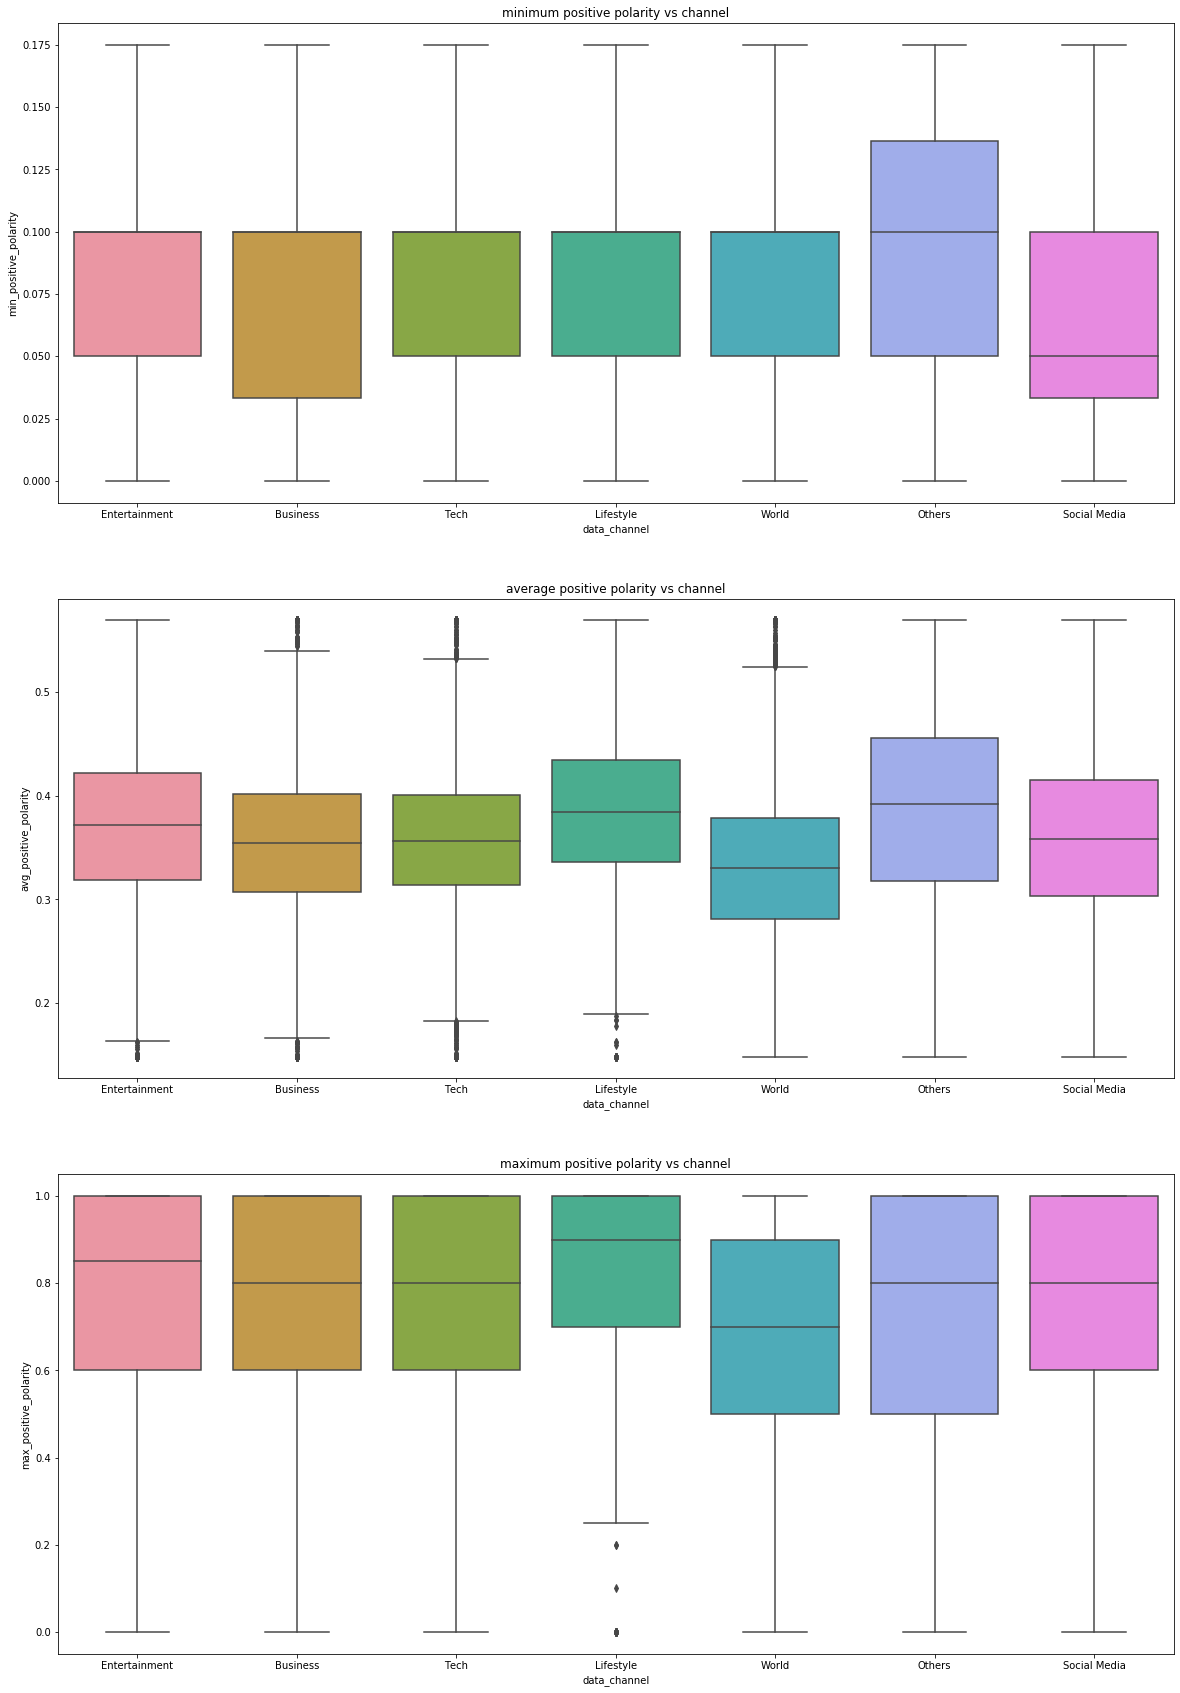

In [30]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sb.boxplot(x=df['data_channel'],y=df['min_positive_polarity'])
plt.title("minimum positive polarity vs channel")

plt.subplot(3,1,2)
sb.boxplot(x=df['data_channel'],y=df['avg_positive_polarity'])
plt.title("average positive polarity vs channel")

plt.subplot(3,1,3)
sb.boxplot(x=df['data_channel'],y=df['max_positive_polarity'])
plt.title("maximum positive polarity vs channel")
plt.show()

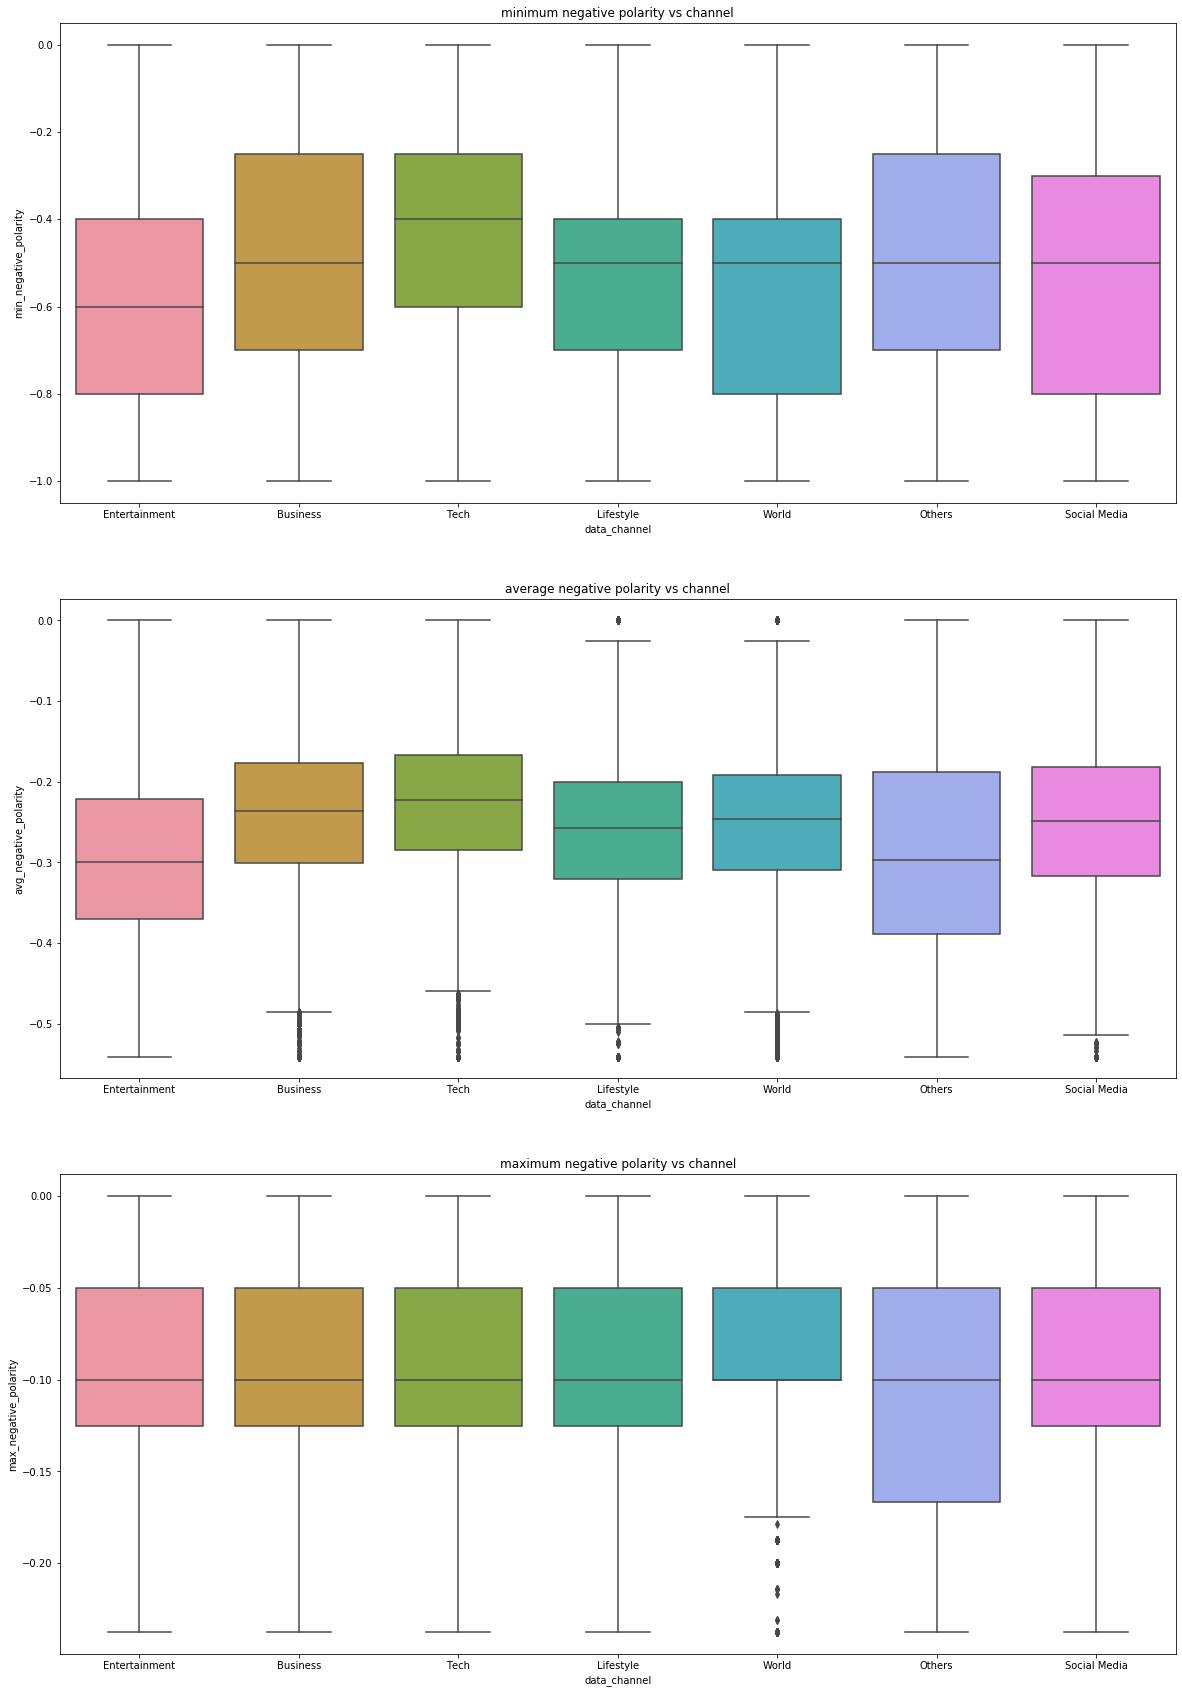

In [31]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
sb.boxplot(x=df['data_channel'],y=df['min_negative_polarity'])
plt.title("minimum negative polarity vs channel")

plt.subplot(3,1,2)
sb.boxplot(x=df['data_channel'],y=df['avg_negative_polarity'])
plt.title("average negative polarity vs channel")

plt.subplot(3,1,3)
sb.boxplot(x=df['data_channel'],y=df['max_negative_polarity'])
plt.title("maximum negative polarity vs channel")
plt.show()

**weekdays and datachannel vs shares**

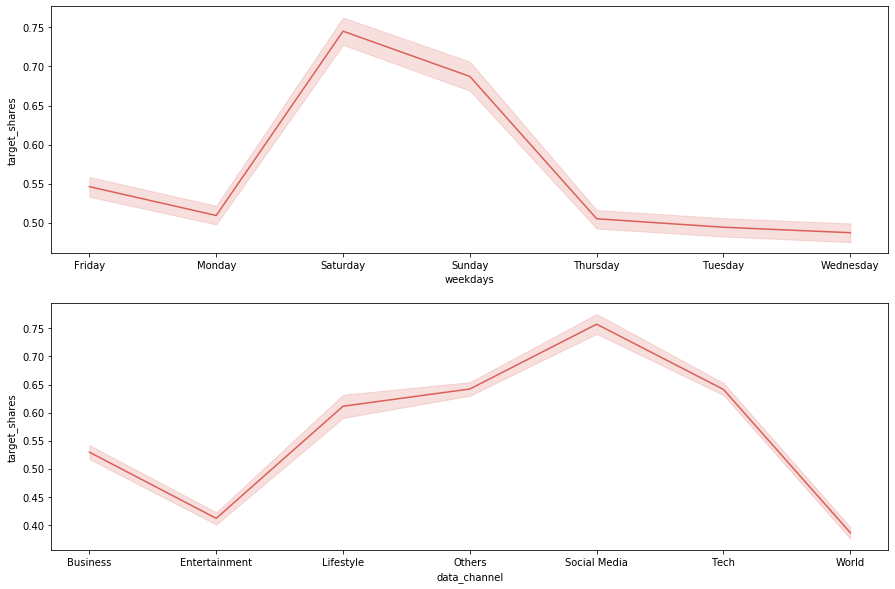

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sb.lineplot(df['weekdays'],df['target_shares'])

plt.subplot(2,1,2)
sb.lineplot(df['data_channel'],df['target_shares'])
plt.show()

**correlation**

In [39]:
forcor = df.drop(['is_weekend','target_shares'],axis=1)

In [40]:
forcor.corr()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.013099,-0.043286,-0.044445,-0.032752,-0.060418,0.008974,-0.024270,0.104124,-0.100567,...,-0.008393,-0.021969,-0.019437,-0.029130,0.012721,0.077242,0.012936,-0.147044,0.052412,0.008598
n_tokens_content,0.013099,1.000000,-0.607865,0.248276,-0.462287,0.458565,0.273215,0.295300,0.029072,0.052962,...,-0.306366,0.468616,-0.180178,-0.496784,0.265855,-0.001568,0.010093,0.012917,0.008699,-0.008204
n_unique_tokens,-0.043286,-0.607865,1.000000,0.435591,0.906951,-0.211603,-0.078041,-0.295229,0.047852,0.244239,...,0.464949,-0.014918,-0.126418,0.153561,-0.378400,0.002623,-0.024668,-0.012172,-0.011070,-0.000118
n_non_stop_words,-0.044445,0.248276,0.435591,1.000000,0.421105,0.225155,0.222734,0.041586,-0.044248,0.438277,...,0.339319,0.535146,-0.376128,-0.315066,-0.287084,-0.031327,-0.012552,0.017794,-0.029231,-0.019643
n_non_stop_unique_tokens,-0.032752,-0.462287,0.906951,0.421105,1.000000,-0.273130,-0.097017,-0.413413,0.038233,0.128282,...,0.356491,0.032895,-0.127316,0.073243,-0.286304,-0.023228,-0.043462,0.001378,-0.035556,-0.014845
num_hrefs,-0.060418,0.458565,-0.211603,0.225155,-0.273130,1.000000,0.350339,0.382958,0.030796,0.273205,...,-0.084076,0.343953,-0.203549,-0.306100,0.041098,0.046263,0.039624,0.007502,0.062467,0.046904
num_self_hrefs,0.008974,0.273215,-0.078041,0.222734,-0.097017,0.350339,1.000000,0.214892,0.076903,0.032694,...,-0.045954,0.210310,-0.094034,-0.126541,-0.004704,-0.019890,0.020374,0.013029,-0.014513,-0.005052
num_imgs,-0.024270,0.295300,-0.295229,0.041586,-0.413413,0.382958,0.214892,1.000000,-0.081589,0.039958,...,-0.017414,0.195293,-0.105172,-0.165249,0.043456,0.069984,0.054467,-0.014825,0.078360,0.048217
num_videos,0.104124,0.029072,0.047852,-0.044248,0.038233,0.030796,0.076903,-0.081589,1.000000,-0.126389,...,0.012787,0.050907,-0.095233,-0.092318,0.008773,0.068546,0.013867,-0.017745,0.057985,0.051328
average_token_length,-0.100567,0.052962,0.244239,0.438277,0.128282,0.273205,0.032694,0.039958,-0.126389,1.000000,...,0.125868,0.138254,-0.130049,-0.088388,-0.156249,-0.045787,-0.031867,0.035102,-0.041372,-0.019238


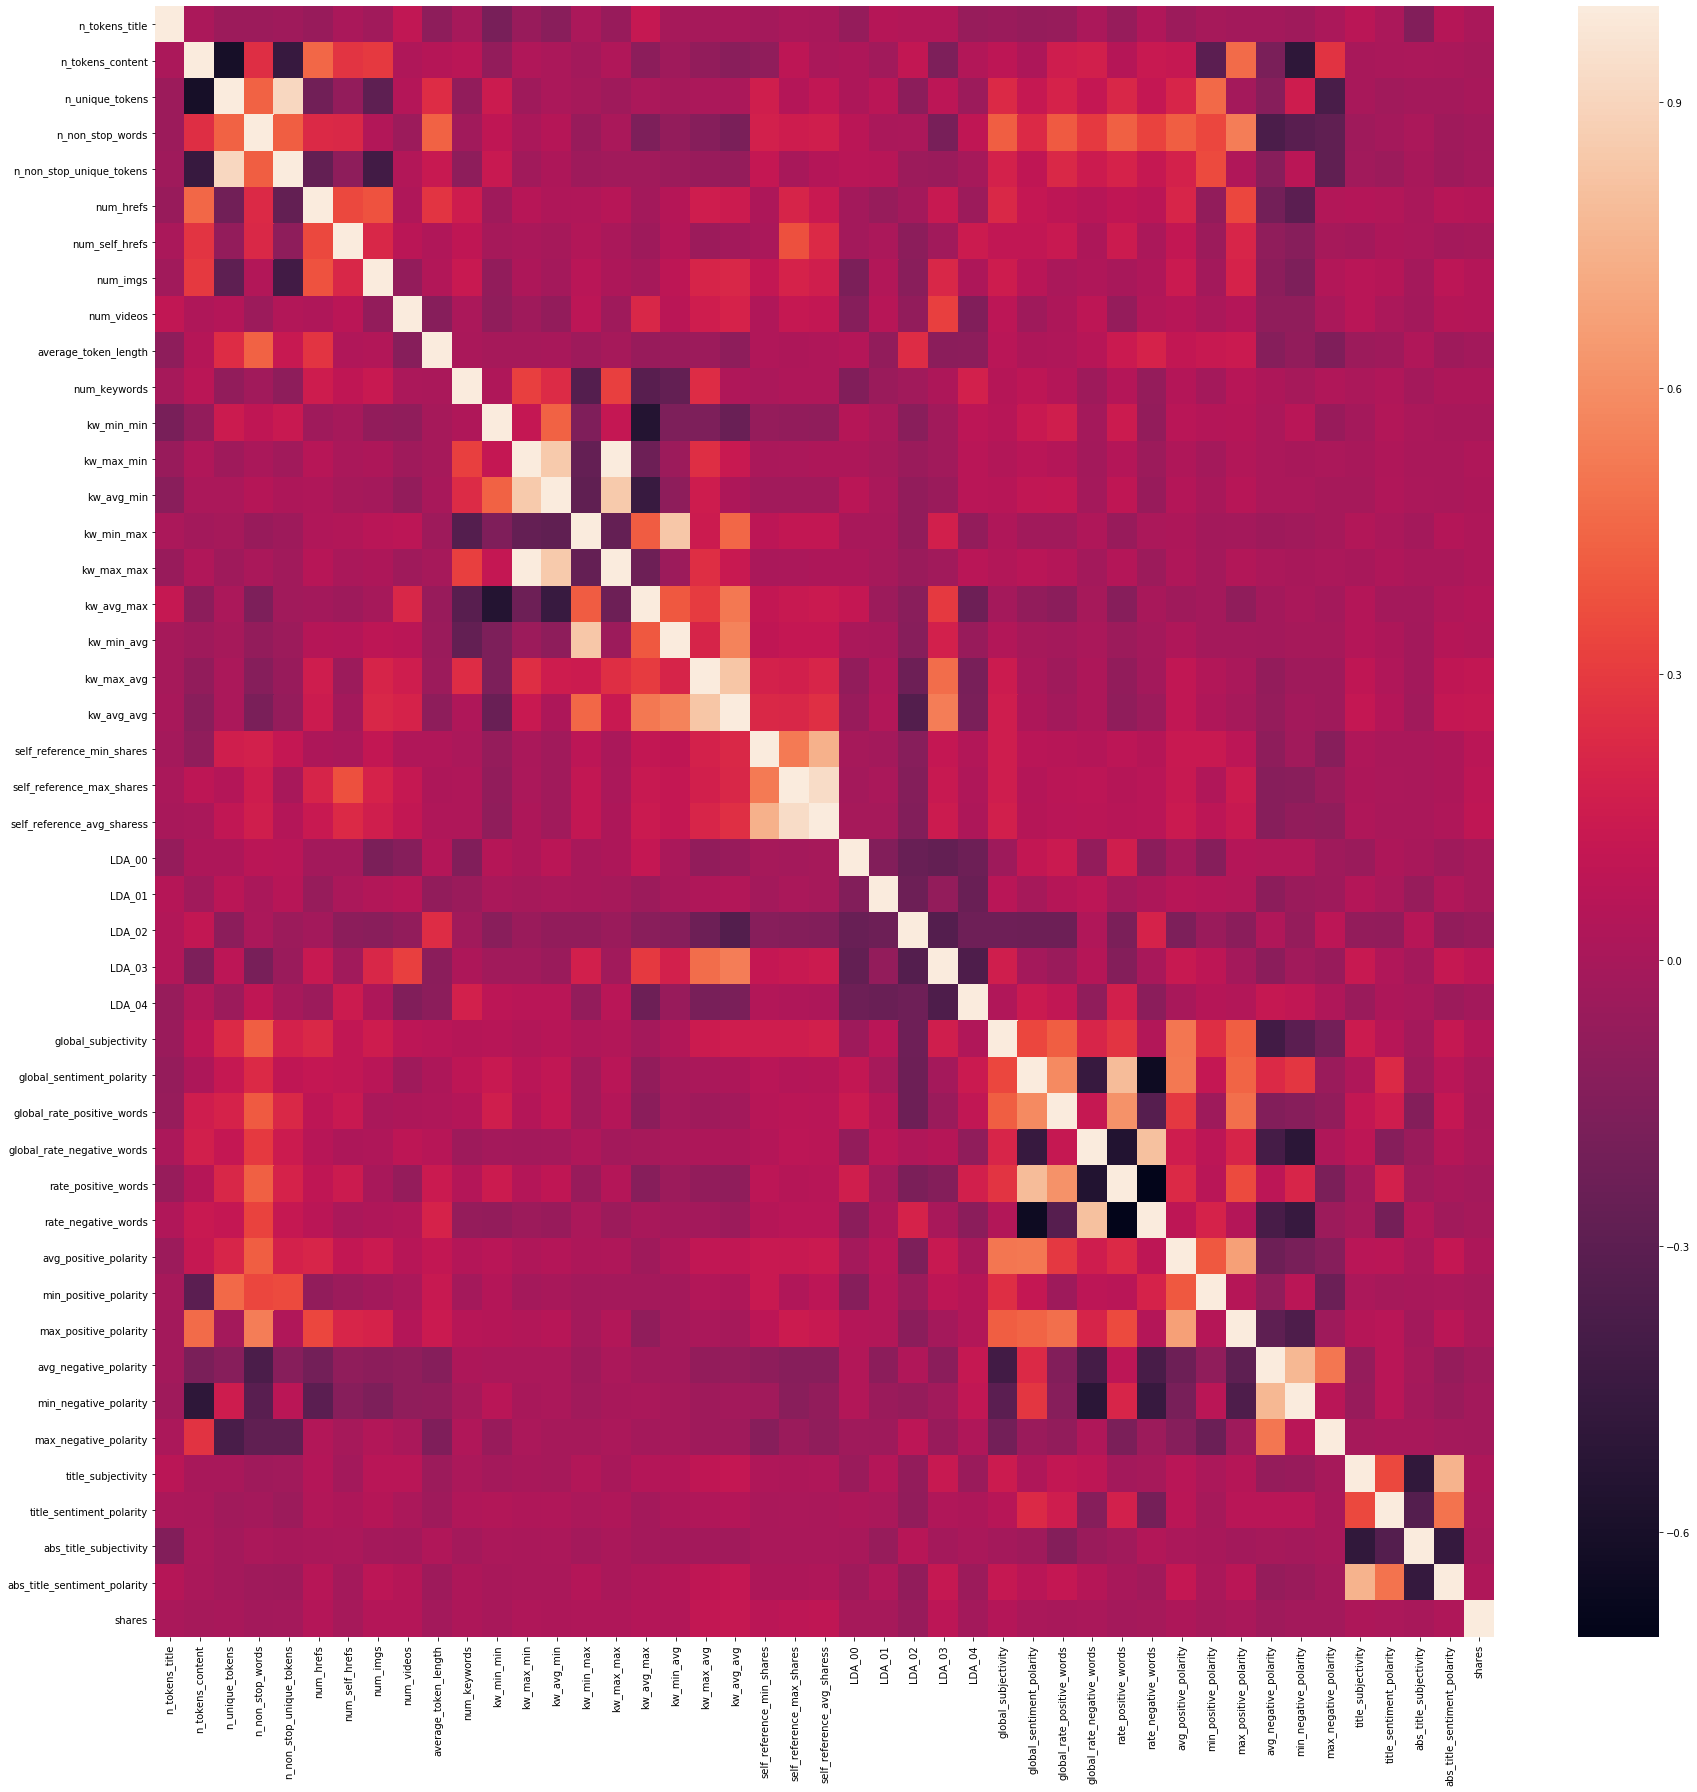

In [41]:
plt.figure(figsize=(30,30))
sb.heatmap(forcor.corr())
plt.show()

In [42]:
cols_kw

['kw_min_min',
 'kw_min_avg',
 'kw_min_max',
 'kw_avg_min',
 'kw_avg_avg',
 'kw_avg_max',
 'kw_max_min',
 'kw_max_avg',
 'kw_max_max']

In [43]:
df['is_weekend'].unique()

array([0., 1.])

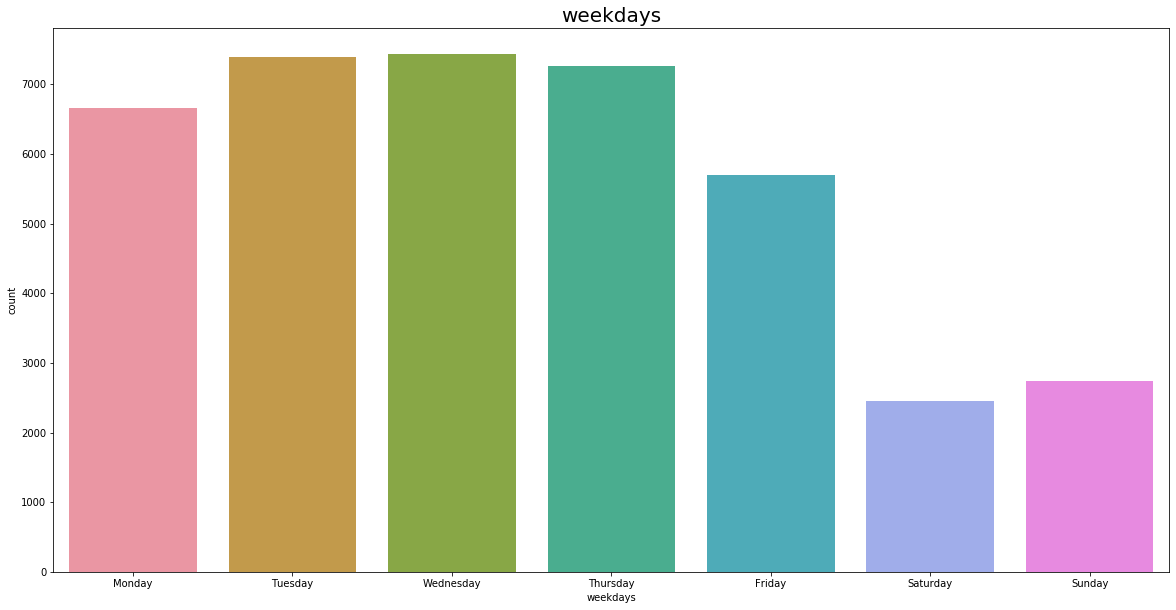

In [44]:
plt.figure(figsize=(20,10))
sb.countplot(df['weekdays'])
plt.title('weekdays',fontsize=20)
plt.show()

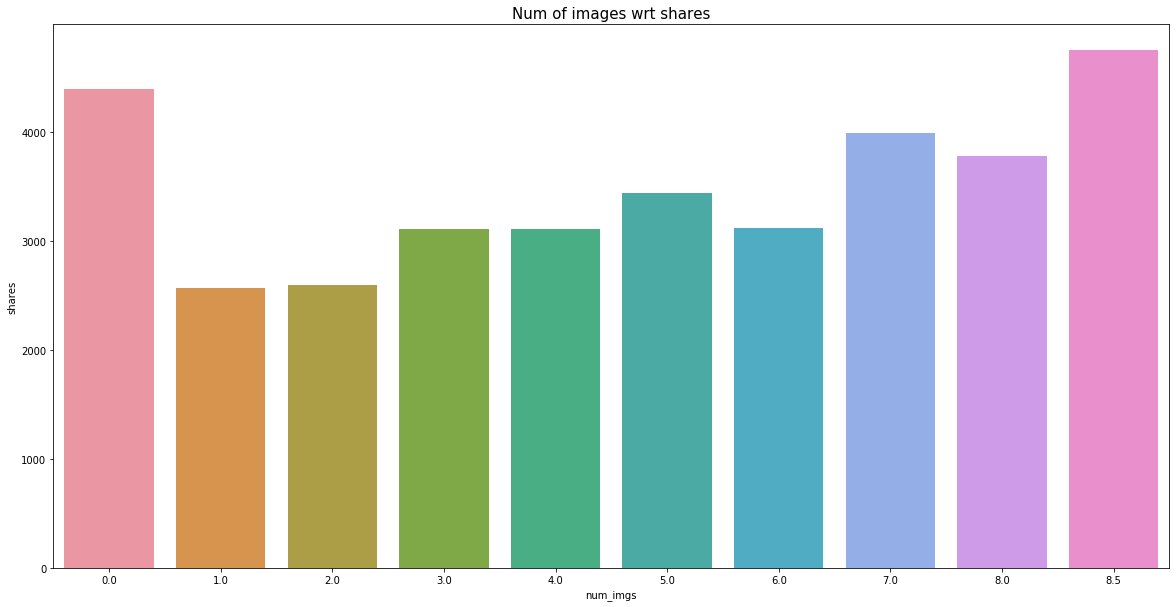

In [135]:
plt.figure(figsize=(20,10))
sb.barplot(df['num_imgs'],df['shares'],ci=None)
plt.title('Num of images wrt shares', fontsize=15)
plt.show()

In [48]:
lab = ['low','medium','high']
df['token'] = pd.qcut(df['average_token_length'],
                              q=[0, .30, .70, 1],
                              labels=lab)

In [49]:
df['token']

0        medium
1          high
2           low
3           low
4        medium
          ...  
39639    medium
39640       low
39641      high
39642      high
39643       low
Name: token, Length: 39644, dtype: category
Categories (3, object): [low < medium < high]

In [53]:
df['token'].values

[medium, high, low, low, medium, ..., medium, low, high, high, low]
Length: 39644
Categories (3, object): [low < medium < high]

In [54]:
df['average_token_length'].describe()

count    39644.000000
mean         4.662453
std          0.299347
min          3.913742
25%          4.478404
50%          4.664082
75%          4.854839
max          5.419497
Name: average_token_length, dtype: float64

In [55]:
df['average_token_length'].head()

0    4.680365
1    4.913725
2    4.393365
3    4.404896
4    4.682836
Name: average_token_length, dtype: float64

In [58]:
df['is_weekend'].value_counts()

0.0    34454
1.0     5190
Name: is_weekend, dtype: int64

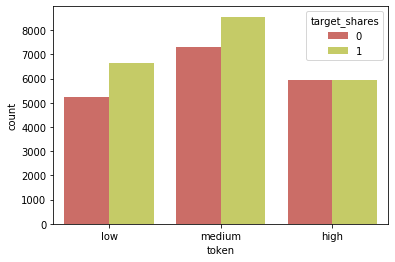

In [61]:
sb.countplot(df['token'],hue=df['target_shares'])

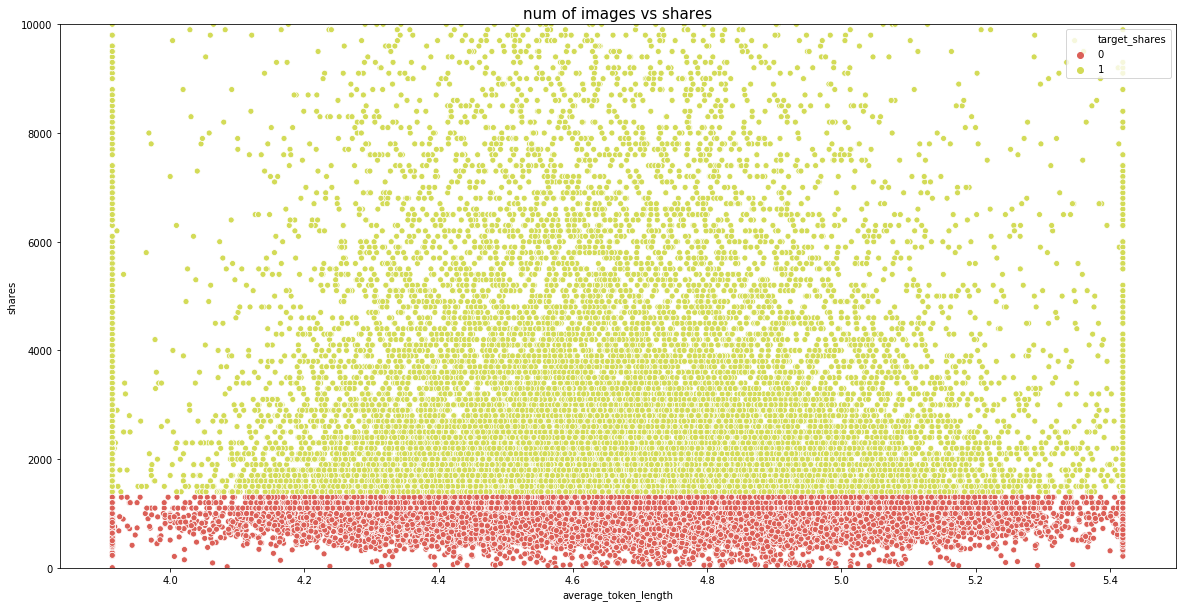

In [129]:
plt.figure(figsize=(20,10))
sb.scatterplot(df['average_token_length'],df['shares'],ci=None,hue=df['target_shares'])
plt.title('num of images vs shares',fontsize=15)
plt.ylim(0,10000)
plt.show()